https://tanthiamhuat.files.wordpress.com/2018/04/mastering-machine-learning-with-scikit-learn.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simple Linear Regression (one predictor)

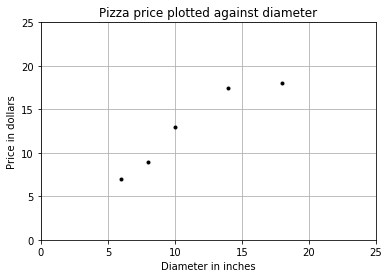

In [2]:
import matplotlib.pyplot as plt
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y,'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

## Brief use of sklearn LinearRegression
#### Prediction on training data

In [3]:
from sklearn.linear_model import LinearRegression
# Training data
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
# Create and fit the model
model = LinearRegression()
model.fit(X, y)
print('A 12" pizza should cost: ${:.2f}'.format(model.predict(12)[0][0]))

A 12" pizza should cost: $13.68


### RSS (prediction - actual)**2

In [4]:
import numpy as np
print('Residual sum of squares: {:.2f}'.format(np.mean((model.predict(X)
- y) ** 2)))

Residual sum of squares: 1.75


### Calculating Variance sum(xi - xmu)**2/n

In [5]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 -
xbar)**2 + (18 - xbar)**2) / 4
print(variance)

import numpy as np
print(np.var([6, 8, 10, 14, 18], ddof=1))

23.2
23.2


### Calculating Variance sum(xi - xmu)*(yi - ymu)/n

In [6]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 -xbar) * (13 - ybar) +(14 - xbar) * (17.5 - ybar) + (18 - xbar) * (18 - ybar)) /4
print(cov)
print(round(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1],2))

22.65
22.65


### Calculating slope (beta) for best fit line (covariance / variance)

In [7]:
beta = cov / variance
beta

0.9762931034482758

### Calculating intercept for best fit line

In [8]:
alpha = ybar - (beta*xbar)
alpha

1.9655172413793114

#### y=mx+b

In [9]:
def lin_reg(x): return round(alpha + (beta*x),2)

lin_reg(12)

13.68

#### R**2 calculates how much your model explains variation in data

In [10]:
from sklearn.linear_model import LinearRegression
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
print('R-squared: %.4f' % model.score(X_test, y_test))

R-squared: 0.6620


# Multiple Linear Regression

### More complicated to calculate beta with multiple predictors
single predictor: y = x*beta

beta = covariance / variance

multiple predictors y = X*beta
### beta = np.dot(inv(np.dot(X.T,X)),np.dot(X.T,y))


In [11]:
from numpy.linalg import inv
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [12]:
K = np.array(X)
K

array([[ 1,  6,  2],
       [ 1,  8,  1],
       [ 1, 10,  0],
       [ 1, 14,  2],
       [ 1, 18,  0]])

In [13]:
K.T

array([[ 1,  1,  1,  1,  1],
       [ 6,  8, 10, 14, 18],
       [ 2,  1,  0,  2,  0]])

In [14]:
f = np.dot(K.T,K)
f

array([[  5,  56,   5],
       [ 56, 720,  48],
       [  5,  48,   9]])

In [15]:
first = inv(f)
first

array([[ 2.71875   , -0.171875  , -0.59375   ],
       [-0.171875  ,  0.01302083,  0.02604167],
       [-0.59375   ,  0.02604167,  0.30208333]])

In [16]:
second = np.dot(K.T,y)
second

array([[ 64.5],
       [813. ],
       [ 58. ]])

In [17]:
print('intercept, coefficients')
dot(first,second)

intercept, coefficients


array([[1.1875    ],
       [1.01041667],
       [0.39583333]])

### Using SK Learn for above calculations

In [18]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))

print('R-squared: {:.2f}'.format(model.score(X_test, y_test)))

Predicted: [10.0625], Target: [11]
Predicted: [10.28125], Target: [8.5]
Predicted: [13.09375], Target: [15]
Predicted: [18.14583333], Target: [18]
Predicted: [13.3125], Target: [11]
R-squared: 0.77


In [19]:
model.intercept_,model.coef_

(array([1.1875]), array([[1.01041667, 0.39583333]]))

### Plots of overfitting

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def polynomial_plot(num_degrees):
    X_train = [[6], [8], [10], [14], [18]]
    y_train = [[7], [9], [13], [17.5], [18]]
    X_test = [[6], [8], [11], [16]]
    y_test = [[8], [12], [15], [18]]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    xx = np.linspace(0, 26, 100)
    yy = regressor.predict(xx.reshape(xx.shape[0], 1))
    plt.plot(xx, yy)
    quadratic_featurizer = PolynomialFeatures(degree=num_degrees)
    X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
    X_test_quadratic = quadratic_featurizer.transform(X_test)
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_train_quadratic, y_train)
    xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.
    shape[0], 1))
    plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',
    linestyle='--')
    plt.title('Pizza price regressed on diameter')
    plt.xlabel('Diameter in inches')
    plt.ylabel('Price in dollars')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    plt.scatter(X_train, y_train)
    plt.show()

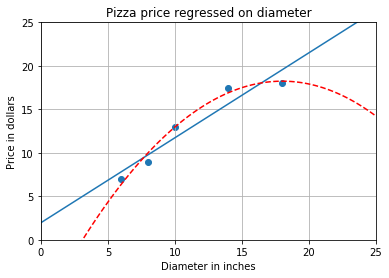

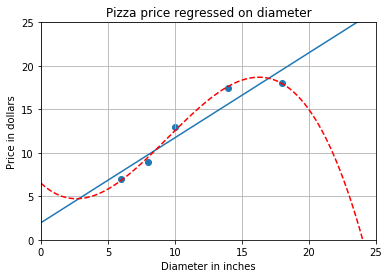

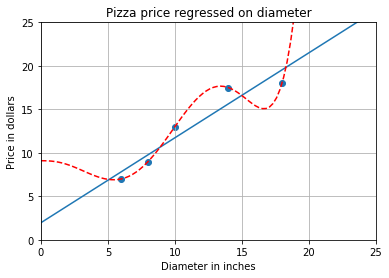

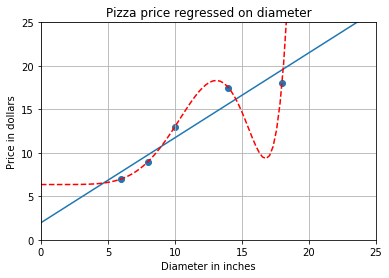

In [21]:
polynomials = [2,3,6,9]
for polynomial in polynomials:
    polynomial_plot(polynomial)

## Random EDA and Cross - Validation

In [22]:
import pandas as pd
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


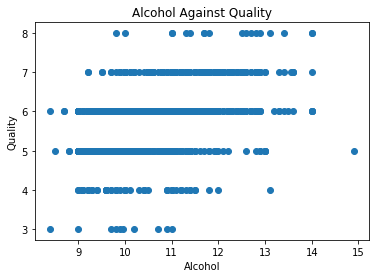

In [23]:
import matplotlib.pylab as plt
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

In [24]:
df.corr().loc['quality',:]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

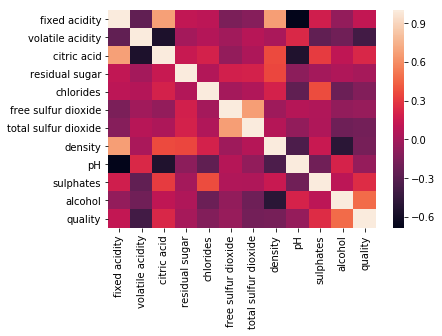

In [25]:
import seaborn as sns

sns.heatmap(df.corr())

In [26]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
df = pd.read_csv('data/winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.35275817396881093


/Users/Chris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
import pandas as pd
from sklearn. cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('data/winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean(), scores)

0.29004162884219653 [0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


## Regularization

## Ridge Regression

#### Uses square values to approach zero

In [62]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)
# calculating mse
mse = np.mean((pred - y_test)**2)
print(mse)
print(ridgeReg.score(X_test,y_test))

0.4194104398857903
0.3551500001755983


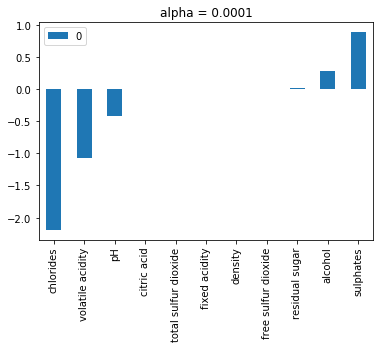

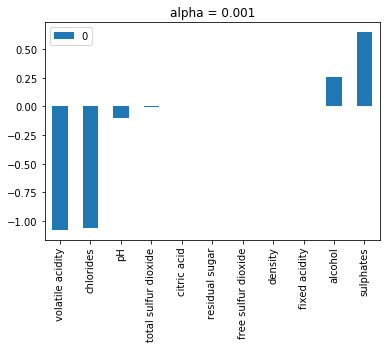

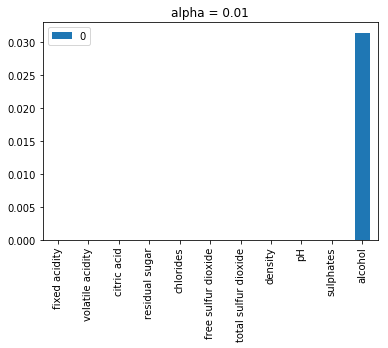

In [66]:
alphas = [.0001,.001,.01]
for alpha in alphas:
    # checking the magnitude of coefficients
    lassoReg = Lasso(alpha=alpha, normalize=True)
    lassoReg.fit(X_train,y_train)
    predictors = X_train.columns
    coef = pd.DataFrame(lassoReg.coef_,predictors).sort_values(by=0)
    coef.plot(kind='bar', title='alpha = {}'.format(alpha))

## Lasso Regression

#### Uses absolute values to reach zero

In [48]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.0001, normalize=True)
lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)
# calculating mse
mse = np.mean((pred - y_test)**2)
print(mse)
print(lassoReg.score(X_test,y_test))

0.42012892545958175
0.3540453175590683


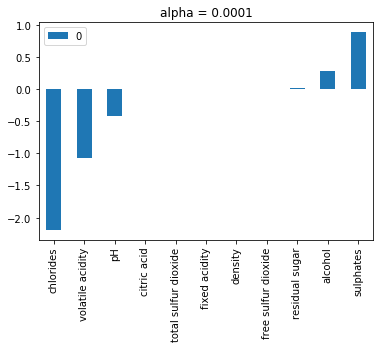

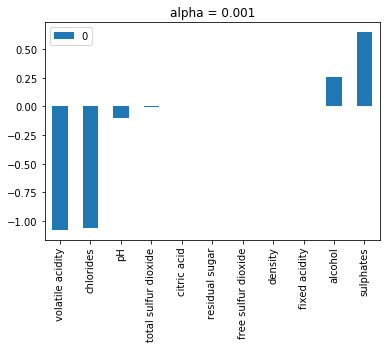

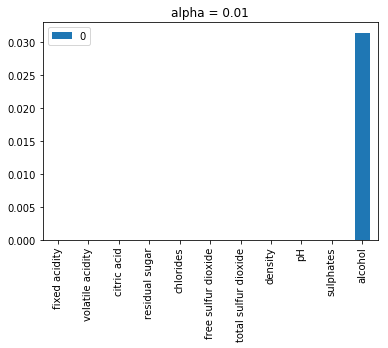

In [67]:
alphas = [.0001,.001,.01]
for alpha in alphas:
    # checking the magnitude of coefficients
    lassoReg = Lasso(alpha=alpha, normalize=True)
    lassoReg.fit(X_train,y_train)
    predictors = X_train.columns
    coef = pd.DataFrame(lassoReg.coef_,predictors).sort_values(by=0)
    coef.plot(kind='bar', title='alpha = {}'.format(alpha))

### Gradient Descent (using entire dataset) & Stochastic Gradient Descent (using individual instances)

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data,
data.target)

In [ ]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [ ]:
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [ ]:
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('Cross validation r-squared scores:', scores)
print('Average cross validation r-squared score:', np.mean(scores))